# 04: Regression Analysis (RQ1)

**RQ1:** What factors predict student trust and satisfaction with ChatGPT?

**Team 5**  
**Date:** December 2025

## Setup

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pathlib import Path

pd.set_option('display.float_format', '{:.4f}'.format)
sns.set_style('whitegrid')

print("✅ Loaded")

✅ Loaded


In [24]:
# Load data
df = pd.read_csv('../../data/cleaned/cleaned_data.csv')
print(f"Sample: {len(df):,} students")

Sample: 22,836 students


/var/folders/mb/rc3s4lgs6gv0dkdmm2ggjlzr0000gn/T/ipykernel_15808/2339387775.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/cleaned/cleaned_data.csv')


## 1. Prepare Regression Data

In [25]:
# Define variables
outcome_var = 'Q15'  # Trust
predictor_vars = ['Q8', 'capabilities_score', 'ethics_concerns_score', 'attitudes_score']

# Drop missing
reg_vars = [outcome_var] + predictor_vars
regression_data = df[reg_vars].dropna()

print(f"\n📊 Regression sample: N = {len(regression_data):,}")
print(f"   ({(len(regression_data)/len(df))*100:.1f}% of original data)")

y = regression_data[outcome_var]
X = regression_data[predictor_vars]


📊 Regression sample: N = 16,095
   (70.5% of original data)


## 2. Check Multicollinearity (VIF)

In [26]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = predictor_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(predictor_vars))]

print("\n" + "="*60)
print("MULTICOLLINEARITY CHECK (VIF)")
print("="*60)
print(vif_data.to_string(index=False))
print("\nNote: VIF < 5 is acceptable, VIF > 10 indicates problems")

if (vif_data['VIF'] > 5).any():
    print("\n⚠️ Warning: Some variables have high VIF")
else:
    print("\n✅ All VIF values acceptable")


MULTICOLLINEARITY CHECK (VIF)
             Variable     VIF
                   Q8  6.6416
   capabilities_score 12.3941
ethics_concerns_score 11.5939
      attitudes_score 16.0580

Note: VIF < 5 is acceptable, VIF > 10 indicates problems

⚠️ Warning: Some variables have high VIF


## 3. Hierarchical Regression

### Model 1: Usage Only

In [27]:
# Model 1
X1 = regression_data[['Q8']]
X1 = sm.add_constant(X1)

model1 = sm.OLS(y, X1).fit()

print("\n" + "="*80)
print("MODEL 1: Usage Frequency")
print("="*80)
print(model1.summary())

r2_model1 = model1.rsquared


MODEL 1: Usage Frequency
                            OLS Regression Results                            
Dep. Variable:                    Q15   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.13
Date:                Mon, 19 Jan 2026   Prob (F-statistic):           2.58e-06
Time:                        15:17:32   Log-Likelihood:                -24862.
No. Observations:               16095   AIC:                         4.973e+04
Df Residuals:                   16093   BIC:                         4.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6775     

### Model 2: Add Capabilities + Ethics

In [28]:
# Model 2
X2 = regression_data[['Q8', 'capabilities_score', 'ethics_concerns_score']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2).fit()

print("\n" + "="*80)
print("MODEL 2: Usage + Capabilities + Ethics")
print("="*80)
print(model2.summary())

r2_model2 = model2.rsquared
delta_r2_2 = r2_model2 - r2_model1
print(f"\n📊 R² change: +{delta_r2_2:.4f}")


MODEL 2: Usage + Capabilities + Ethics
                            OLS Regression Results                            
Dep. Variable:                    Q15   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     567.9
Date:                Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:17:32   Log-Likelihood:                -24063.
No. Observations:               16095   AIC:                         4.813e+04
Df Residuals:                   16091   BIC:                         4.817e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### Model 3: Full Model (Add Attitudes)

In [29]:
# Model 3
X3 = regression_data[predictor_vars]
X3 = sm.add_constant(X3)

model3 = sm.OLS(y, X3).fit()

print("\n" + "="*80)
print("MODEL 3: Full Model")
print("="*80)
print(model3.summary())

r2_model3 = model3.rsquared
delta_r2_3 = r2_model3 - r2_model2
print(f"\n📊 R² change from Model 2: +{delta_r2_3:.4f}")


MODEL 3: Full Model
                            OLS Regression Results                            
Dep. Variable:                    Q15   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     436.2
Date:                Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:17:32   Log-Likelihood:                -24045.
No. Observations:               16095   AIC:                         4.810e+04
Df Residuals:                   16090   BIC:                         4.814e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const    

## 4. Model Comparison

In [30]:
# Comparison table
comparison = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Predictors': ['Usage', 'Usage + Cap + Ethics', 'All'],
    'R²': [r2_model1, r2_model2, r2_model3],
    'Adj. R²': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj],
    'ΔR²': [r2_model1, delta_r2_2, delta_r2_3]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison.round(4).to_string(index=False))

# Save
output_dir = Path('../../results/tables')
output_dir.mkdir(parents=True, exist_ok=True)
comparison.to_csv(output_dir / 'model_comparison.csv', index=False)
print("\n✅ Saved to results/tables/model_comparison.csv")


MODEL COMPARISON
  Model           Predictors     R²  Adj. R²    ΔR²
Model 1                Usage 0.0014   0.0013 0.0014
Model 2 Usage + Cap + Ethics 0.0957   0.0956 0.0944
Model 3                  All 0.0978   0.0976 0.0021

✅ Saved to results/tables/model_comparison.csv


## 5. Final Model Results

In [31]:
print("\n" + "="*80)
print("FINAL MODEL RESULTS")
print("="*80)

print(f"\nR² = {model3.rsquared:.4f}")
print(f"Adjusted R² = {model3.rsquared_adj:.4f}")
print(f"F-statistic = {model3.fvalue:.4f}")
print(f"p-value = {model3.f_pvalue:.4e}")
print(f"N = {int(model3.nobs)}")

print("\nCoefficients:")
print("-" * 60)

for var, coef, pval in zip(model3.model.exog_names[1:], model3.params[1:], model3.pvalues[1:]):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "ns"
    print(f"{var:30s}: β = {coef:7.4f} {sig:3s} (p = {pval:.4f})")

print("\nNote: *** p<0.001, ** p<0.01, * p<0.05")


FINAL MODEL RESULTS

R² = 0.0978
Adjusted R² = 0.0976
F-statistic = 436.2487
p-value = 0.0000e+00
N = 16095

Coefficients:
------------------------------------------------------------
Q8                            : β =  0.1094 *** (p = 0.0000)
capabilities_score            : β = -0.0862 *** (p = 0.0000)
ethics_concerns_score         : β =  0.4423 *** (p = 0.0000)
attitudes_score               : β = -0.0650 *** (p = 0.0000)

Note: *** p<0.001, ** p<0.01, * p<0.05


In [32]:
# Save full output
output_dir_stats = Path('../../results/statistical_outputs')
output_dir_stats.mkdir(parents=True, exist_ok=True)

with open(output_dir_stats / 'regression_full.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("HIERARCHICAL REGRESSION ANALYSIS\n")
    f.write("Predicting Trust (Q15)\n")
    f.write("="*80 + "\n\n")
    
    f.write("MODEL 1: Usage\n")
    f.write("-"*80 + "\n")
    f.write(model1.summary().as_text())
    f.write("\n\n")
    
    f.write("MODEL 2: Usage + Capabilities + Ethics\n")
    f.write("-"*80 + "\n")
    f.write(model2.summary().as_text())
    f.write("\n\n")
    
    f.write("MODEL 3: Full Model\n")
    f.write("-"*80 + "\n")
    f.write(model3.summary().as_text())

print("\n✅ Full output saved to results/statistical_outputs/regression_full.txt")


✅ Full output saved to results/statistical_outputs/regression_full.txt


## 6. Regression Diagnostics

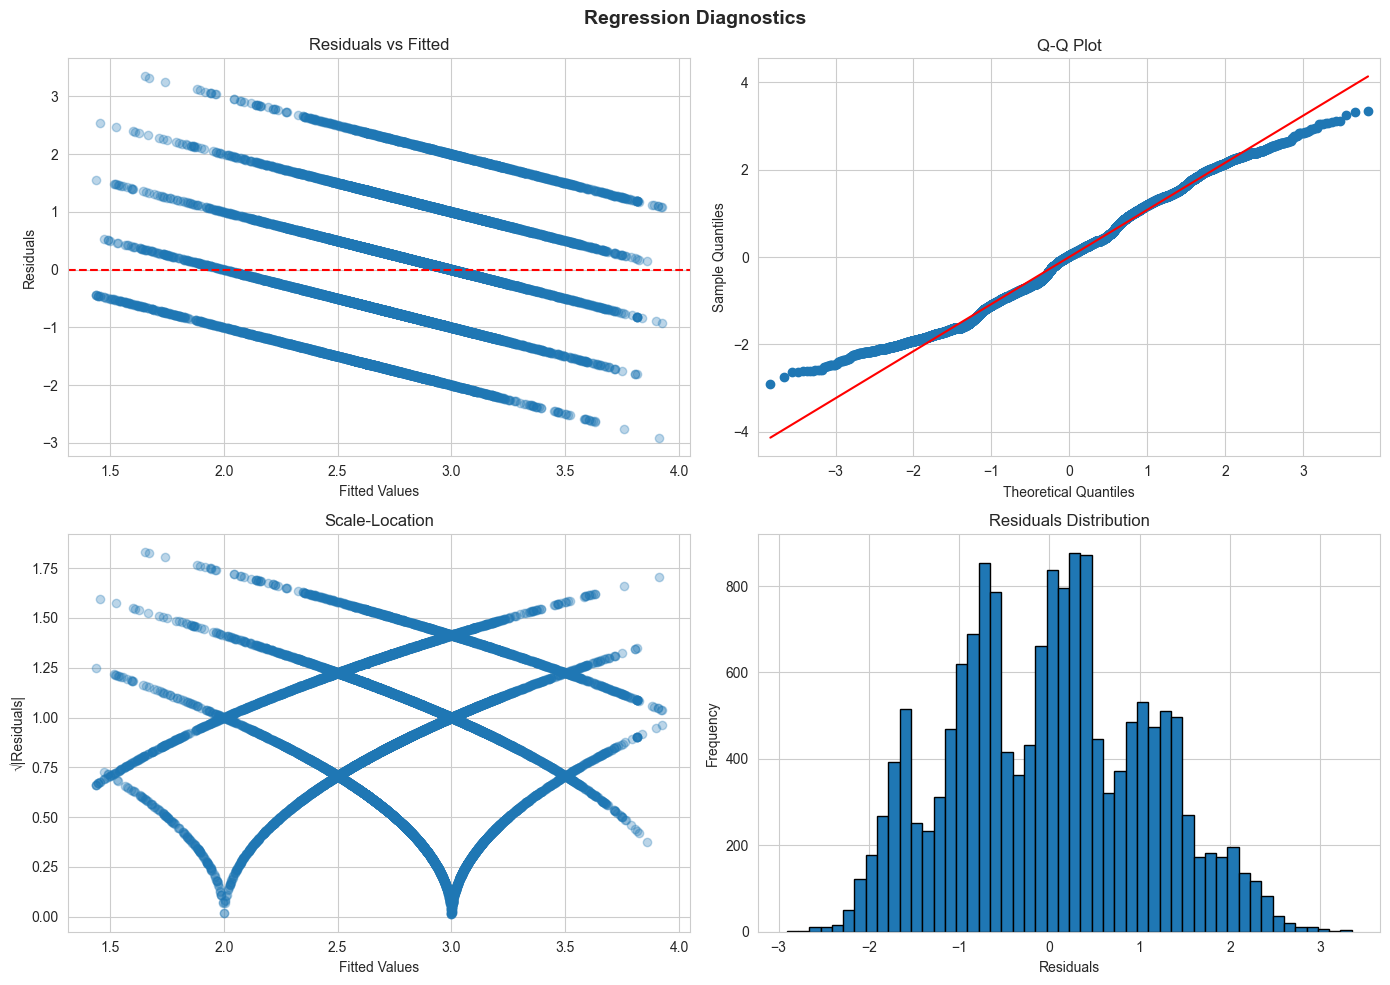

✅ Saved to results/figures/regression_diagnostics.png


In [33]:
# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs Fitted
axes[0, 0].scatter(model3.fittedvalues, model3.resid, alpha=0.3)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# Q-Q Plot
sm.qqplot(model3.resid, line='s', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Scale-Location
axes[1, 0].scatter(model3.fittedvalues, np.sqrt(np.abs(model3.resid)), alpha=0.3)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Residuals|')
axes[1, 0].set_title('Scale-Location')

# Residuals Histogram
axes[1, 1].hist(model3.resid, bins=50, edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Residuals Distribution')

plt.suptitle('Regression Diagnostics', fontsize=14, fontweight='bold')
plt.tight_layout()

# Save
fig_dir = Path('../../results/figures')
fig_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_dir / 'regression_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/regression_diagnostics.png")

## 7. Coefficient Plot

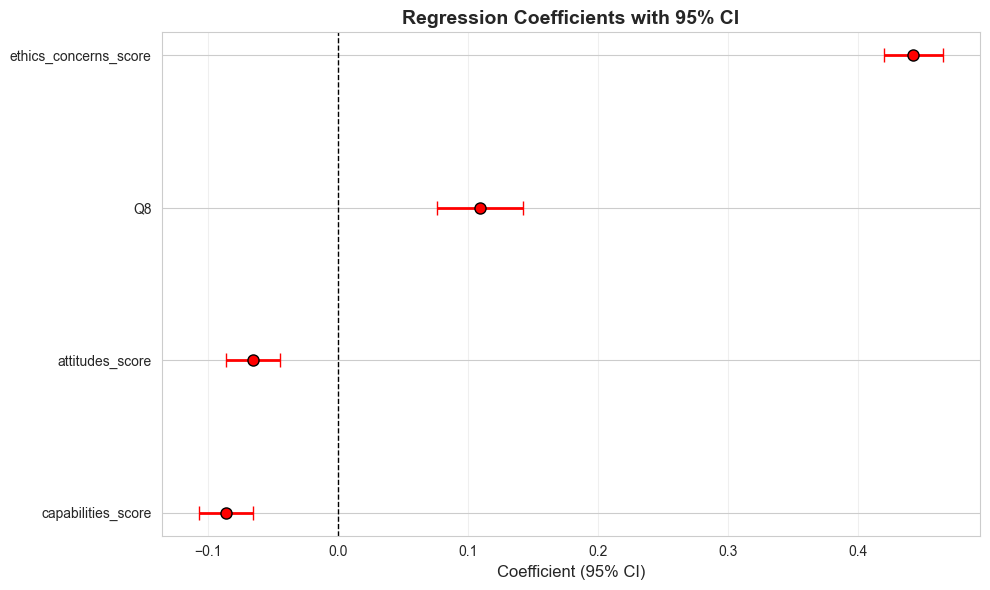

✅ Saved to results/figures/coefficient_plot.png


In [36]:
# Create coefficient plot
coef_df = pd.DataFrame({
    'Variable': model3.model.exog_names[1:],
    'Coefficient': model3.params[1:],
    'CI_lower': model3.conf_int()[0][1:],
    'CI_upper': model3.conf_int()[1][1:],
    'p_value': model3.pvalues[1:]
})

coef_df = coef_df.sort_values('Coefficient')

fig, ax = plt.subplots(figsize=(10, 6))
for i, row in coef_df.iterrows():
    color = 'red' if row['p_value'] < 0.05 else 'gray'
    y_pos = list(coef_df.index).index(i)

    ax.errorbar(row['Coefficient'], y_pos, 
                xerr=[[row['Coefficient'] - row['CI_lower']], [row['CI_upper'] - row['Coefficient']]],
                fmt='o', 
                color=color,           
                ecolor=color,
                elinewidth=2,          
                markersize=8, 
                capsize=5, 
                markeredgecolor='black')

ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.set_yticks(range(len(coef_df)))
ax.set_yticklabels(coef_df['Variable'])
ax.set_xlabel('Coefficient (95% CI)', fontsize=12)
ax.set_title('Regression Coefficients with 95% CI', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(fig_dir / 'coefficient_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/coefficient_plot.png")

## 8. Key Findings (RQ1)

In [ ]:
print("\n" + "="*80)
print("KEY FINDINGS (RQ1)")
print("="*80)

print(f"""
📊 Model Performance:
   - Final model explains {model3.rsquared*100:.1f}% of variance in Trust
   - R² = {model3.rsquared:.4f}
   - Highly significant (F = {model3.fvalue:.2f}, p < 0.001)
   - Sample: N = {int(model3.nobs):,}

📈 Significant Predictors:
""")

for var, coef, pval in zip(model3.model.exog_names[1:], model3.params[1:], model3.pvalues[1:]):
    if pval < 0.05:
        direction = "positively" if coef > 0 else "negatively"
        print(f"   - {var}: {direction} predicts trust (β = {coef:.4f}, p < {pval:.4f})")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("""
Files Created:
✅ results/tables/model_comparison.csv
✅ results/statistical_outputs/regression_full.txt
✅ results/figures/regression_diagnostics.png
✅ results/figures/coefficient_plot.png

All analyses complete! Ready for paper writing.
""")


KEY FINDINGS (RQ1)

📊 Model Performance:
   - Final model explains 9.8% of variance in Trust
   - R² = 0.0978
   - Highly significant (F = 436.25, p < 0.001)
   - Sample: N = 16,095

📈 Significant Predictors:

   - Q8: positively predicts trust (β = 0.1094, p < 0.0000)
   - capabilities_score: negatively predicts trust (β = -0.0862, p < 0.0000)
   - ethics_concerns_score: positively predicts trust (β = 0.4423, p < 0.0000)
   - attitudes_score: negatively predicts trust (β = -0.0650, p < 0.0000)

ANALYSIS COMPLETE

Files Created:
✅ results/tables/model_comparison.csv
✅ results/statistical_outputs/regression_full.txt
✅ results/figures/regression_diagnostics.png
✅ results/figures/coefficient_plot.png

All analyses complete! Ready for paper writing.

